In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import time
%matplotlib inline

# Load, Train , Validate and test split

In [2]:
import pandas as pd

df = pd.read_csv('transformed_final.csv', index_col=[0])

In [3]:
print(df.isna().sum())

Date                      0
Solar                    15
Wind                     15
Other_Renewables         15
Nuclear                  15
Large_Hydro              15
Thermal                  15
Total_Generation         15
Imports                  15
Demand                   15
Solar_Cost                0
Wind_Cost                 0
Other_Renewables_Cost     0
Nuclear_Cost              0
Large_hydro_Cost          0
Thermal_Cost              0
Imports_Cost              0
Total_Cost                0
dtype: int64


In [4]:
df = df.dropna()

In [5]:
print(df.isna().sum())

Date                     0
Solar                    0
Wind                     0
Other_Renewables         0
Nuclear                  0
Large_Hydro              0
Thermal                  0
Total_Generation         0
Imports                  0
Demand                   0
Solar_Cost               0
Wind_Cost                0
Other_Renewables_Cost    0
Nuclear_Cost             0
Large_hydro_Cost         0
Thermal_Cost             0
Imports_Cost             0
Total_Cost               0
dtype: int64


In [6]:
df = df.iloc[:,0:10]

In [7]:
df2 = df

In [8]:
df2

,Date,Solar,Wind,Other_Renewables,Nuclear,Large_Hydro,Thermal,Total_Generation,Imports,Demand
0,1/1/18 0:00,0.0,235.94,1792.25,2260.08,2108.13,7230.35,13626.74,7501.24,21128.46
1,1/1/18 1:00,0.0,277.46,1795.68,2259.49,2050.22,6694.36,13077.22,7452.54,20529.07
2,1/1/18 2:00,0.0,127.77,1796.31,2259.80,2038.66,6260.44,12482.98,7497.59,19980.80
3,1/1/18 3:00,0.0,82.08,1792.84,2260.64,1963.58,6185.52,12284.67,7333.05,19618.61
4,1/1/18 4:00,0.0,126.64,1794.96,2260.81,2053.11,6377.04,12612.56,7026.12,19638.23
...,...,...,...,...,...,...,...,...,...,...
43819,12/31/22 19:00,0.0,3744.20,1571.77,2246.56,2085.78,8699.66,18347.97,6740.47,25093.71
43820,12/31/22 20:00,0.0,4051.58,1585.13,2246.43,2062.55,8037.57,17983.27,6338.44,24330.05
43821,12/31/22 21:00,0.0,3533.87,1609.50,2245.81,1718.05,7748.51,16855.74,6877.79,23738.42
43822,12/31/22 22:00,0.0,3148.30,1601.04,2244.10,1277.12,8316.41,16586.97,6433.43,23025.66


In [9]:
#Test-Train Split
X1 = df2[['Solar', 'Wind', 'Other_Renewables', 'Nuclear', 'Large_Hydro', 'Thermal', 'Imports']]
y1 = df2['Demand']
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.2,shuffle=False)

In [10]:
X_train

,Solar,Wind,Other_Renewables,Nuclear,Large_Hydro,Thermal,Imports
0,0.0,235.94,1792.25,2260.08,2108.13,7230.35,7501.24
1,0.0,277.46,1795.68,2259.49,2050.22,6694.36,7452.54
2,0.0,127.77,1796.31,2259.80,2038.66,6260.44,7497.59
3,0.0,82.08,1792.84,2260.64,1963.58,6185.52,7333.05
4,0.0,126.64,1794.96,2260.81,2053.11,6377.04,7026.12
...,...,...,...,...,...,...,...
35056,560.3,3201.81,1587.24,2265.18,2222.51,7917.78,6843.44
35057,0.0,3069.96,1616.16,2265.35,2560.25,9823.93,7767.06
35058,0.0,2860.16,1621.47,2265.16,2565.55,9799.24,8029.36
35059,0.0,2739.31,1621.63,2264.43,2197.25,9705.40,7984.39


In [11]:

X_test

,Solar,Wind,Other_Renewables,Nuclear,Large_Hydro,Thermal,Imports
35061,0.0,2976.27,1571.34,2266.36,1553.23,8562.03,8091.14
35062,0.0,3125.21,1569.61,2265.33,1344.94,7160.03,8610.51
35063,0.0,3147.79,1553.23,2264.80,1217.16,6631.24,8428.59
35064,0.0,3159.46,1506.83,2264.56,1099.00,6377.28,7896.52
35065,0.0,2830.20,1513.40,2265.14,1095.42,5986.87,7800.06
...,...,...,...,...,...,...,...
43819,0.0,3744.20,1571.77,2246.56,2085.78,8699.66,6740.47
43820,0.0,4051.58,1585.13,2246.43,2062.55,8037.57,6338.44
43821,0.0,3533.87,1609.50,2245.81,1718.05,7748.51,6877.79
43822,0.0,3148.30,1601.04,2244.10,1277.12,8316.41,6433.43


# Base Model Random Forest

In [12]:
# Train a Random Forest Regressor model
start_time = time.time()
model = RandomForestRegressor(n_estimators=50, max_depth=5)
model.fit(X_train, y_train)

# Calculate the R^2 score on the test set
y_pred = model.predict(X_test)
end_time = time.time()
run_time = end_time - start_time
print(f"Random forest model took {run_time:.2f} seconds to fit.")

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)
print('Test set RMSE:', rmse)
print('Test set MAPE:', mape)
print('Test set R2 score:', r2)

Random forest model took 5.04 seconds to fit.
Test set RMSE: 2325.5653693545983
Test set MAPE: 7.1252113965130555
Test set R2 score: 0.7944874906445312


# Hyperparameter Tuning 

In [13]:

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
}

# Create a Random Forest Regressor model
start_time = time.time()
model = RandomForestRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
end_time = time.time()
run_time = end_time - start_time
print(f"Random forest model took {run_time:.2f} seconds to fit.")

# Print the best hyperparameter values and corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)


Random forest model took 777.80 seconds to fit.
Best hyperparameters: {'max_depth': 20, 'n_estimators': 200}
Best score: 0.9535778322184418


# Best Model

In [42]:

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)
print('Test set RMSE:', rmse)
print('Test set MAPE:', mape)
print('Test set R2 score:', r2)

Test set RMSE: 1087.986088898434
Test set MAPE: 2.9049385818760807
Test set R2 score: 0.9550191307545373


# Actual vs predicted chart

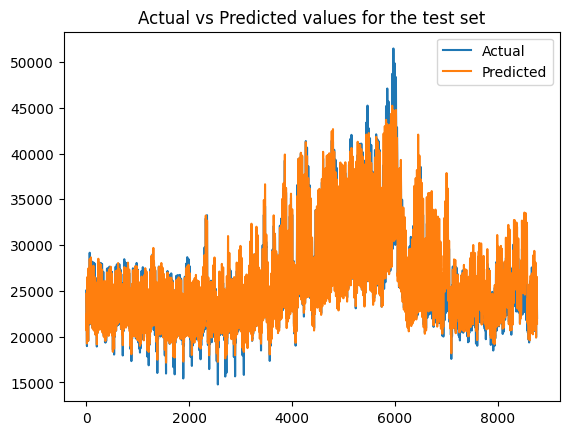

In [43]:
#Plotting the actual vs predicted values for the test set:
import matplotlib.pyplot as plt

y_test1 = y_test.to_numpy()

plt.plot(y_test1, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted values for the test set")
plt.show()

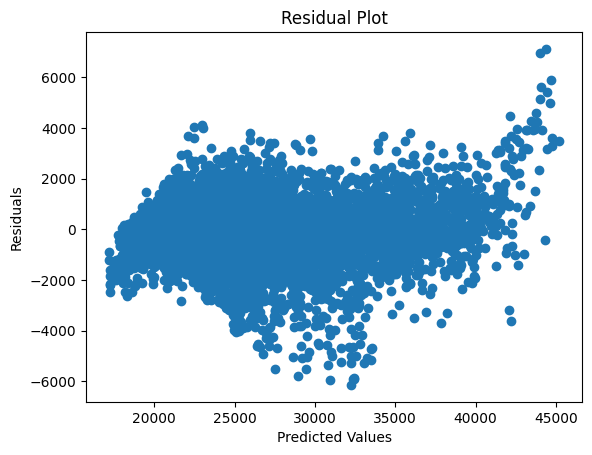

In [44]:
# Plotting the residual plot to check for homoscedasticity:

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

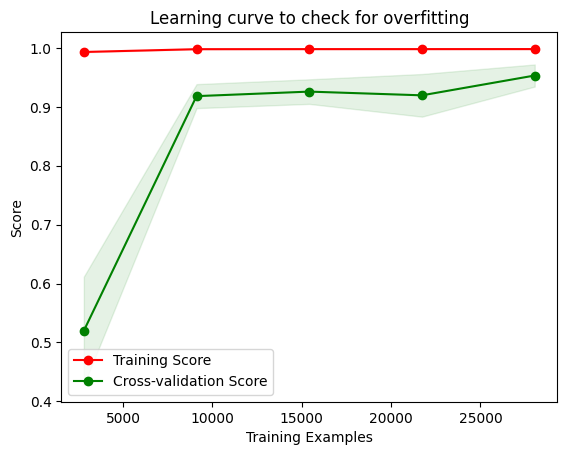

In [17]:
#Plotting the learning curve to check for overfitting:

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.plot(train_sizes, train_mean, 'o-', color="r",
         label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g",
         label="Cross-validation Score")
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, alpha=0.1,
                 color="g")
plt.legend()
plt.title("Learning curve to check for overfitting")
plt.show()

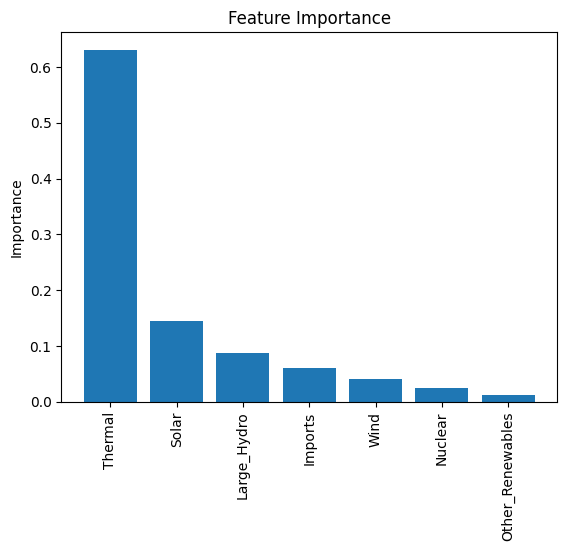

In [45]:
#Plotting Feature Importance Plot:
importances = best_model.feature_importances_
feature_names = X1.columns.values
indices = np.argsort(importances)[::-1]

plt.bar(range(X1.shape[1]), importances[indices])
plt.xticks(range(X1.shape[1]), feature_names[indices], rotation=90)
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.show()

# Cost Minimization 

### Load the initial data again

In [46]:
data = pd.read_csv('transformed_final.csv',index_col=0)
data = data.dropna()
data

,Date,Solar,Wind,Other_Renewables,Nuclear,Large_Hydro,Thermal,Total_Generation,Imports,Demand,Solar_Cost,Wind_Cost,Other_Renewables_Cost,Nuclear_Cost,Large_hydro_Cost,Thermal_Cost,Imports_Cost,Total_Cost
0,1/1/18 0:00,0.0,235.94,1792.25,2260.08,2108.13,7230.35,13626.74,7501.24,21128.46,0.0,3513.15,40020.94,53925.51,22451.58,164273.55,335980.54,620165.27
1,1/1/18 1:00,0.0,277.46,1795.68,2259.49,2050.22,6694.36,13077.22,7452.54,20529.07,0.0,4131.38,40097.53,53911.43,21834.84,152095.86,333799.27,605870.31
2,1/1/18 2:00,0.0,127.77,1796.31,2259.80,2038.66,6260.44,12482.98,7497.59,19980.80,0.0,1902.50,40111.60,53918.83,21711.73,142237.20,335817.06,595698.91
3,1/1/18 3:00,0.0,82.08,1792.84,2260.64,1963.58,6185.52,12284.67,7333.05,19618.61,0.0,1222.17,40034.12,53938.87,20912.13,140535.01,328447.31,585089.61
4,1/1/18 4:00,0.0,126.64,1794.96,2260.81,2053.11,6377.04,12612.56,7026.12,19638.23,0.0,1885.67,40081.46,53942.93,21865.62,144886.35,314699.91,577361.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,12/31/22 19:00,0.0,3744.20,1571.77,2246.56,2085.78,8699.66,18347.97,6740.47,25093.71,0.0,51407.87,35883.51,51805.67,24215.91,213924.64,290042.42,667280.02
43820,12/31/22 20:00,0.0,4051.58,1585.13,2246.43,2062.55,8037.57,17983.27,6338.44,24330.05,0.0,55628.19,36188.52,51802.68,23946.21,197643.85,272743.07,637952.51
43821,12/31/22 21:00,0.0,3533.87,1609.50,2245.81,1718.05,7748.51,16855.74,6877.79,23738.42,0.0,48520.04,36744.88,51788.38,19946.56,190535.86,295951.30,643487.02
43822,12/31/22 22:00,0.0,3148.30,1601.04,2244.10,1277.12,8316.41,16586.97,6433.43,23025.66,0.0,43226.16,36551.74,51748.95,14827.36,204500.52,276830.49,627685.23


# Extracting the test set data and adding the predictied load forecast for new dataframe

In [47]:
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

In [48]:
test_data = test_data.iloc[:,0:10]
test_data

,Date,Solar,Wind,Other_Renewables,Nuclear,Large_Hydro,Thermal,Total_Generation,Imports,Demand
35061,12/31/21 21:00,0.0,2976.27,1571.34,2266.36,1553.23,8562.03,16929.24,8091.14,25022.98
35062,12/31/21 22:00,0.0,3125.21,1569.61,2265.33,1344.94,7160.03,15465.12,8610.51,24080.30
35063,12/31/21 23:00,0.0,3147.79,1553.23,2264.80,1217.16,6631.24,14814.23,8428.59,23249.26
35064,1/1/22 0:00,0.0,3159.46,1506.83,2264.56,1099.00,6377.28,14407.14,7896.52,22310.30
35065,1/1/22 1:00,0.0,2830.20,1513.40,2265.14,1095.42,5986.87,13691.03,7800.06,21497.54
...,...,...,...,...,...,...,...,...,...,...
43819,12/31/22 19:00,0.0,3744.20,1571.77,2246.56,2085.78,8699.66,18347.97,6740.47,25093.71
43820,12/31/22 20:00,0.0,4051.58,1585.13,2246.43,2062.55,8037.57,17983.27,6338.44,24330.05
43821,12/31/22 21:00,0.0,3533.87,1609.50,2245.81,1718.05,7748.51,16855.74,6877.79,23738.42
43822,12/31/22 22:00,0.0,3148.30,1601.04,2244.10,1277.12,8316.41,16586.97,6433.43,23025.66


In [49]:
test_data = test_data.set_index('Date')

In [50]:
test_data

,Solar,Wind,Other_Renewables,Nuclear,Large_Hydro,Thermal,Total_Generation,Imports,Demand
Date,,,,,,,,,
12/31/21 21:00,0.0,2976.27,1571.34,2266.36,1553.23,8562.03,16929.24,8091.14,25022.98
12/31/21 22:00,0.0,3125.21,1569.61,2265.33,1344.94,7160.03,15465.12,8610.51,24080.30
12/31/21 23:00,0.0,3147.79,1553.23,2264.80,1217.16,6631.24,14814.23,8428.59,23249.26
1/1/22 0:00,0.0,3159.46,1506.83,2264.56,1099.00,6377.28,14407.14,7896.52,22310.30
1/1/22 1:00,0.0,2830.20,1513.40,2265.14,1095.42,5986.87,13691.03,7800.06,21497.54
...,...,...,...,...,...,...,...,...,...
12/31/22 19:00,0.0,3744.20,1571.77,2246.56,2085.78,8699.66,18347.97,6740.47,25093.71
12/31/22 20:00,0.0,4051.58,1585.13,2246.43,2062.55,8037.57,17983.27,6338.44,24330.05
12/31/22 21:00,0.0,3533.87,1609.50,2245.81,1718.05,7748.51,16855.74,6877.79,23738.42


In [51]:
y_pred 

array([24671.35334506, 24041.42547631, 23207.93306415, ...,
       23521.12975429, 22193.76891032, 21423.69405857])

In [52]:
forecasted_df = pd.DataFrame(y_pred, columns=['Demand_forecast'])

In [53]:
test_data['Demand_forecast'] = forecasted_df.values

In [54]:
final_df = test_data

# Calculating the net demand and production status

In [55]:
final_df['Net_Demand'] = final_df['Demand']- final_df['Demand_forecast']
final_df = final_df.round(2)

In [56]:
final_df['production_status'] = np.where(final_df['Net_Demand'] == 0, 'Forecasted_Equilibrium', np.where(final_df['Net_Demand'] > 0, 'Forecasted_Underproduce', 'Forecasted_Overproduce'))

In [57]:
final_df

,Solar,Wind,Other_Renewables,Nuclear,Large_Hydro,Thermal,Total_Generation,Imports,Demand,Demand_forecast,Net_Demand,production_status
Date,,,,,,,,,,,,
12/31/21 21:00,0.0,2976.27,1571.34,2266.36,1553.23,8562.03,16929.24,8091.14,25022.98,24671.35,351.63,Forecasted_Underproduce
12/31/21 22:00,0.0,3125.21,1569.61,2265.33,1344.94,7160.03,15465.12,8610.51,24080.30,24041.43,38.87,Forecasted_Underproduce
12/31/21 23:00,0.0,3147.79,1553.23,2264.80,1217.16,6631.24,14814.23,8428.59,23249.26,23207.93,41.33,Forecasted_Underproduce
1/1/22 0:00,0.0,3159.46,1506.83,2264.56,1099.00,6377.28,14407.14,7896.52,22310.30,22318.85,-8.55,Forecasted_Overproduce
1/1/22 1:00,0.0,2830.20,1513.40,2265.14,1095.42,5986.87,13691.03,7800.06,21497.54,21516.92,-19.38,Forecasted_Overproduce
...,...,...,...,...,...,...,...,...,...,...,...,...
12/31/22 19:00,0.0,3744.20,1571.77,2246.56,2085.78,8699.66,18347.97,6740.47,25093.71,24920.67,173.04,Forecasted_Underproduce
12/31/22 20:00,0.0,4051.58,1585.13,2246.43,2062.55,8037.57,17983.27,6338.44,24330.05,23956.29,373.76,Forecasted_Underproduce
12/31/22 21:00,0.0,3533.87,1609.50,2245.81,1718.05,7748.51,16855.74,6877.79,23738.42,23521.13,217.29,Forecasted_Underproduce


# Cost savings and storage calculations

In [58]:
def calculate_savings(row):
    savings = 0
    if row['production_status'] == 'Forecasted_Overproduce' and row['Net_Demand'] < 0:
        # storage = 0
        if abs(row['Net_Demand']) <= row['Imports']:
            savings -= abs(row['Net_Demand']) * 43.03
            # storage = abs(row['Net_demand'])
            # return abs(row['Net_Demand']) * 43.03
        elif abs(row['Net_Demand']) >= row['Imports'] and row['Imports'] > 0:
            savings -= (abs(row['Net_Demand'])) * 43.03
            #storage = (abs(row['Net_demand'])-row['Imports'])
        else:
            net_demand = row['Net_Demand']
            imports = abs(row['Imports'])
            # savings = 0
            nuclear_cost = 23.06
            thermal_cost = 24.59
            import_cost = 43.03
            ev_charge = 0.4
            if abs(net_demand) >= imports and row['Imports'] < 0:
                savings -= abs(net_demand)* import_cost
                # storage += abs(net_demand)
                if imports > 0:
                    if imports >= row['Nuclear']:
                            savings += row['Nuclear'] * nuclear_cost
                            imports -= row['Nuclear']
                            if imports > 0:
                                if imports >= row['Thermal']:
                                    savings += row['Thermal'] * thermal_cost
                                    imports -= row['Thermal']
                                    if imports > 0:
                                        savings += imports * ev_charge
                                else: 
                                    savings += imports * thermal_cost
                    else:
                        savings += imports * nuclear_cost    
            else:
                imports = imports + net_demand
                # storage = net_demand
                if imports > 0:
                    if imports >= row['Nuclear']:
                        savings += row['Nuclear'] * nuclear_cost
                        imports -= row['Nuclear']
                        if imports > 0:
                            if imports >= row['Thermal']:
                                savings += row['Thermal'] * thermal_cost
                                imports -= row['Thermal']
                                if imports > 0:
                                    savings += imports * ev_charge
                            else: 
                                savings += imports * thermal_cost
                    else:
                        savings += imports * nuclear_cost
        return savings
        
    elif row['production_status'] == 'Forecasted_Underproduce':
        # storage  = 0
        net_demand = row['Net_Demand']
        imports = row['Imports']
        savings = 0
        import_cost = 43.03
        nuclear_cost = 23.06
        thermal_cost = 24.59
        ev_charge = 0.4
        if net_demand >= 0 and imports >= 0:
            savings -= net_demand * import_cost
            # storage += net_demand
        elif net_demand > 0 and imports < 0:
            remaining_imports = abs(imports) - net_demand
            if remaining_imports >= row['Nuclear']:
                savings += (remaining_imports - row['Nuclear']) * nuclear_cost
                remaining_imports -= row['Nuclear']
                if remaining_imports > 0:
                    if remaining_imports >= row['Thermal']:
                        savings += (remaining_imports - row['Thermal']) * thermal_cost
                        remaining_imports -= row('Thermal')
                        if remaining_imports > 0:
                            savings += remaining_imports * ev_charge
                    else:
                        savings += remaining_imports * thermal_cost
            else:
                savings +=  remaining_imports * nuclear_cost           
        return savings
    else:
        return 0 


final_df['total_cost_savings'] = final_df.apply(calculate_savings, axis=1)

In [59]:
def storage(rows):
    storage = 0
    if rows['production_status'] == 'Forecasted_Overproduce' and rows['Net_Demand'] < 0:
        if abs(rows['Net_Demand']) <= rows['Imports']:
            storage += abs(rows['Net_Demand'])
        if abs(rows['Net_Demand']) >= abs(rows['Imports']) and rows['Imports'] > 0:
            storage += (abs(rows['Net_Demand']))
        else:
            if abs(rows['Net_Demand']) >= rows['Imports'] and rows['Imports'] < 0:
                if abs(rows['Net_Demand']) > abs(rows['Imports']):

                    storage += (abs(rows['Net_Demand']) )
                if abs(rows['Net_Demand']) < abs(rows['Imports']):
                    storage = (abs(rows['Net_Demand']))
        return storage
    else:
        return 0
        
final_df['total_storage'] = final_df.apply(storage, axis=1)

In [60]:
final_df = final_df.reset_index()
final_df['Date'] = pd.to_datetime(final_df['Date'])
final_df = final_df.set_index('Date')

# Extracring a day to look at the cost savings and storage

In [61]:
final_df_week = final_df.loc['2022-04-25':'2022-04-30']
final_df_day = final_df_week.iloc[-24:]
final_df_day_1 = final_df_day.loc['2022-04-30 09:00:00':'2022-04-30 17:00:00']

In [62]:
final_df_day_1

,Solar,Wind,Other_Renewables,Nuclear,Large_Hydro,Thermal,Total_Generation,Imports,Demand,Demand_forecast,Net_Demand,production_status,total_cost_savings,total_storage
Date,,,,,,,,,,,,,,
2022-04-30 09:00:00,11544.94,1852.04,1382.75,2185.40,821.67,2173.38,19960.18,-792.71,19172.05,19184.07,-12.02,Forecasted_Overproduce,18002.7114,12.02
2022-04-30 10:00:00,12189.05,1499.17,1376.94,2185.33,872.63,2089.64,20212.76,-1699.11,18520.19,19168.32,-648.13,Forecasted_Overproduce,24235.5988,648.13
2022-04-30 11:00:00,12727.10,1476.18,1370.08,2184.53,752.30,2076.31,20586.51,-2389.41,18199.69,19169.15,-969.46,Forecasted_Overproduce,32744.0470,969.46
2022-04-30 12:00:00,12592.44,1813.68,1369.48,2187.59,677.55,2064.10,20704.84,-2916.53,17787.73,19335.88,-1548.15,Forecasted_Overproduce,31554.8428,1548.15
2022-04-30 13:00:00,11794.23,3112.27,1373.75,2209.95,564.96,2066.99,21122.15,-3094.16,18026.24,19795.44,-1769.20,Forecasted_Overproduce,30553.5776,1769.20
2022-04-30 14:00:00,12105.99,4141.79,1374.83,2234.35,606.31,2131.49,22594.76,-3980.49,18609.51,20593.59,-1984.08,Forecasted_Overproduce,46037.2146,1984.08
2022-04-30 15:00:00,11478.55,4633.88,1420.24,2236.30,877.88,2618.27,23265.12,-4102.73,19156.00,20411.36,-1255.36,Forecasted_Overproduce,66595.2893,1255.36
2022-04-30 16:00:00,11078.81,4933.57,1434.72,2237.58,1038.57,3359.58,24082.82,-3797.65,20276.71,21055.69,-778.98,Forecasted_Overproduce,70805.5979,778.98
2022-04-30 17:00:00,10045.43,4993.80,1448.56,2246.22,1263.97,4850.86,24848.83,-2651.99,22187.21,23834.48,-1647.27,Forecasted_Overproduce,23168.8432,1647.27


In [63]:
total_savings = final_df_day_1['total_cost_savings'].sum()
total_storage = final_df_day_1['total_storage'].sum()
storage_use_nuclear = total_storage * 23.06
storage_use_thermal = total_storage * 24.59
storage_use_imports = total_storage * 44.03
storage_use_sell = total_storage * 0.4

formated_ts = "Total ${:.2f} savings due to accurate demand forecasting".format(total_savings)
formated_s = "{:.2f} MWh stored due to accurate demand forecasting".format(total_storage)
formated_s_n = "${:.2f} saved on 2022-04-31 by reducing nuclear generation as compensated through storage from previous day".format(storage_use_nuclear)
formated_s_t = "${:.2f} saved on 2022-04-31 by reducing thermal generation as compensated through storage from previous day".format(storage_use_thermal)
formated_s_i = "${:.2f} saved on 2022-04-31 by reducing imports as compensated through storage from previous day ".format(storage_use_imports)
formated_s_s = "${:.2f} saved on 2022-04-31 by selling the overproduced electricity for electric vehicle charging when total renewable energy achieved ".format(storage_use_sell.round(2))

# print the total value
print(formated_ts)
print(formated_s)
print(formated_s_n)
print(formated_s_t)
print(formated_s_i)
print(formated_s_s)

Total $343697.72 savings due to accurate demand forecasting
10612.65 MWh stored due to accurate demand forecasting
$244727.71 saved on 2022-04-31 by reducing nuclear generation as compensated through storage from previous day
$260965.06 saved on 2022-04-31 by reducing thermal generation as compensated through storage from previous day
$467274.98 saved on 2022-04-31 by reducing imports as compensated through storage from previous day 
$4245.06 saved on 2022-04-31 by selling the overproduced electricity for electric vehicle charging when total renewable energy achieved 


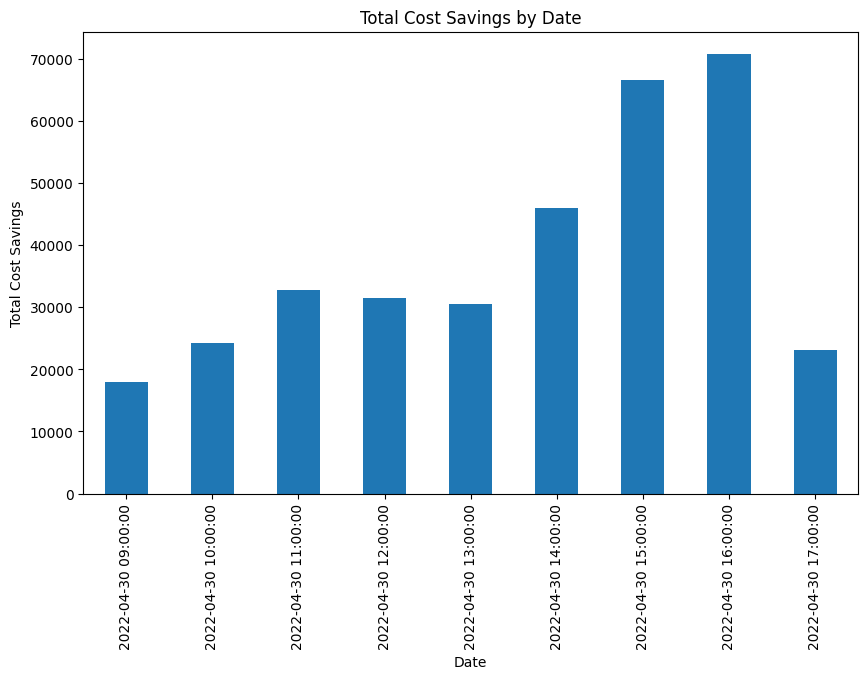

In [64]:
final_df_day_1['total_cost_savings'].plot(kind='bar', figsize=(10, 6))
plt.title('Total Cost Savings by Date')
plt.xlabel('Date')
plt.ylabel('Total Cost Savings')
plt.show()